# PART 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Clustering_Clean_Ads_Data.xlsx')

In [3]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [4]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [5]:
df.shape

(23066, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [10]:
def impute_CPM(df):
    return (df.Spend/df.Impressions)*1000

In [11]:
def impute_CPC(df):
    return df.Spend/df.Clicks

In [12]:
def impute_CTR(df):
    return (df.Clicks/df.Impressions)*100

In [13]:
df.CTR.fillna(impute_CTR(df),inplace=True)

In [14]:
df.CPC.fillna(impute_CPC(df),inplace=True)

In [15]:
df.CPM.fillna(impute_CPM(df),inplace=True)

In [16]:
df.isna().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.000000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.000000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.000000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.000000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.500000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.000000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.000000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.125000,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.350000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.335000,2.091338e+03,21276.18


In [18]:
df[df.CTR == 0.0001]

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
2032,2020-10-2-3,Format7,300,600,180000,Inter222,Video,Desktop,Display,82132,52340,45981,5,36.32,0.35,23.61,0.0001,0.79,7.26


In [19]:
df[df.CTR == 200.0]

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
22857,2020-9-9-17,Format5,720,300,216000,Inter225,Video,Mobile,Display,8,2,1,2,0.15,0.35,0.0975,200.0,150.0,0.075


In [20]:
df[df.CPM == 715.0]

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23047,2020-9-4-7,Format4,120,600,72000,Inter221,App,Mobile,Display,2,2,2,1,1.43,0.35,0.9295,50.0,715.0,1.43


In [21]:
num_df = df.select_dtypes(['int64','float64']).columns

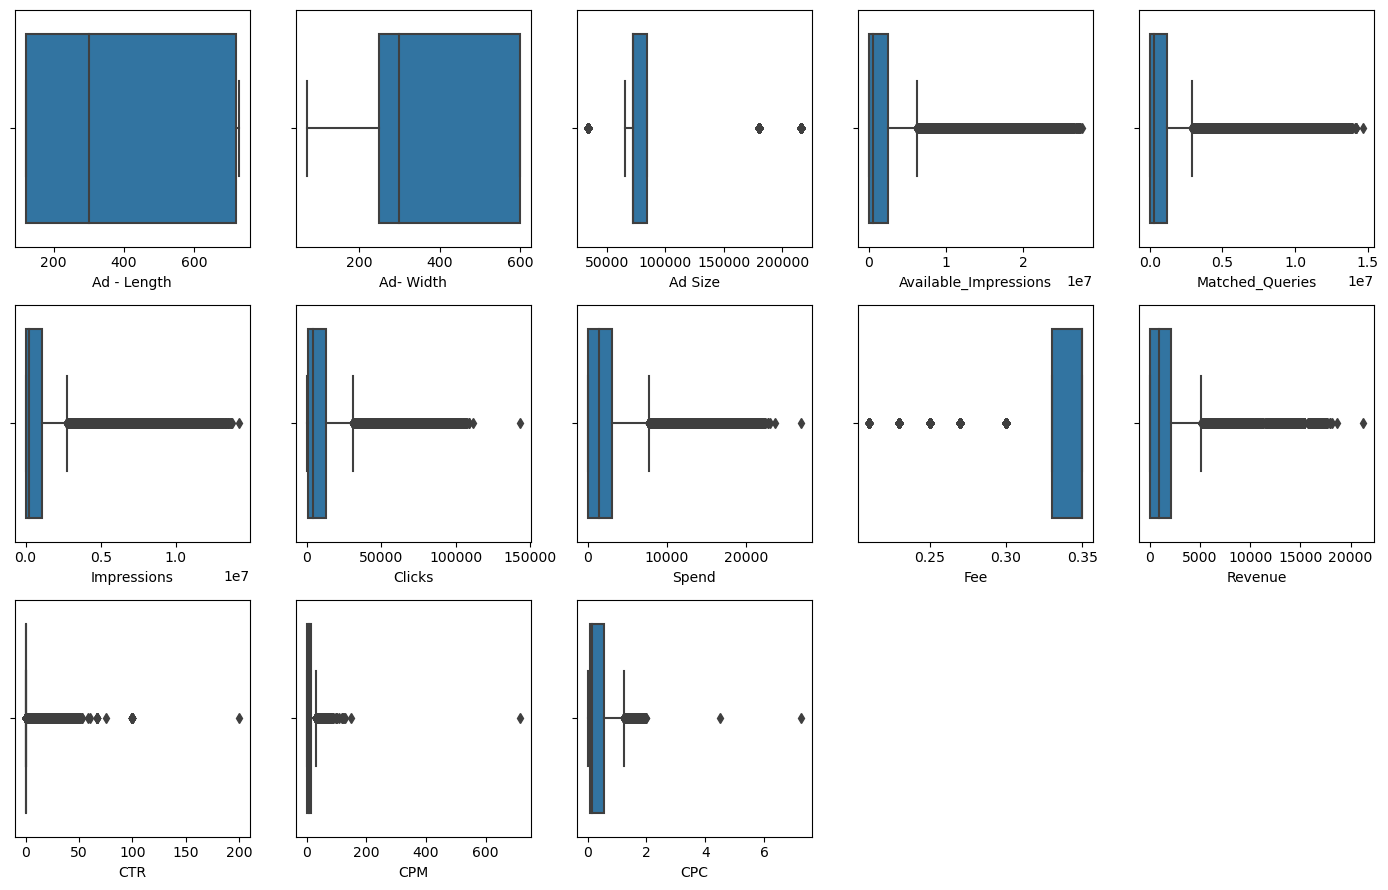

In [22]:

plt.figure(figsize = (14,9))
for i in range(0,len(num_df)):
    plt.subplot(3,5,i+1)
    sns.boxplot(df[num_df[i]])
plt.tight_layout()



In [23]:
# There Exists outliers and the outlier may be genuine and its clearly genuine for CTR,CPM,CPC as calculated previously 
# The K-means  algorithm is affected by outliers, because a mean is easily influenced by extreme values
# So , we need to treat the outlies using the concept with interquantile Distance

def outlier_data(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    LL = Q1 - (1.5*IQR)
    UL = Q3 + (1.5*IQR)
    return LL,UL

In [24]:
for i in num_df:
    LL,UL = outlier_data(df[i])
    df[i] = np.where(df[i]>UL,UL,df[i])
    df[i] = np.where(df[i]<LL,LL,df[i])

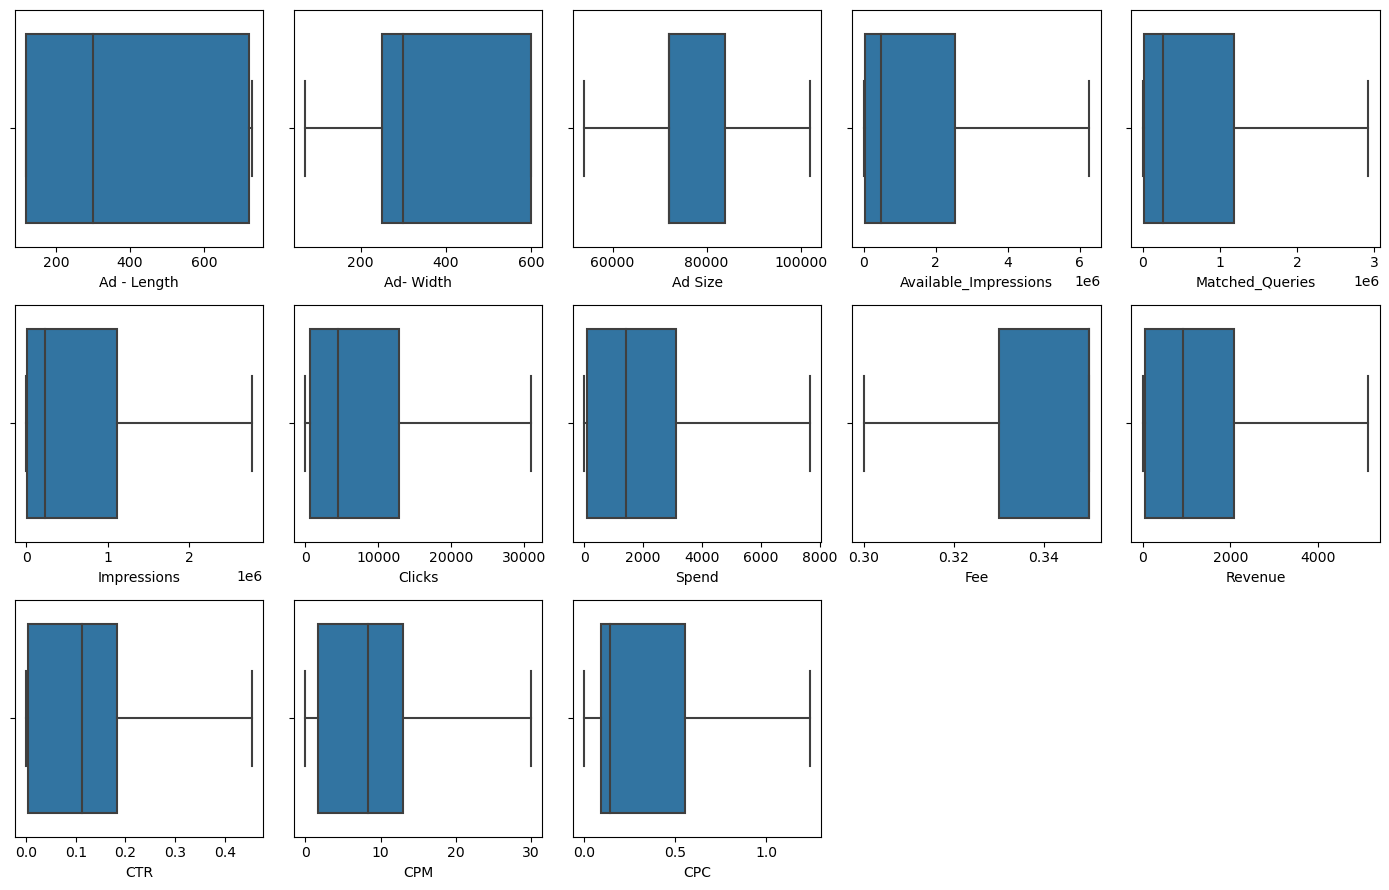

In [25]:
plt.figure(figsize = (14,9))
for i in range(0,len(num_df)):
    plt.subplot(3,5,i+1)
    sns.boxplot(df[num_df[i]])
plt.tight_layout()

In [26]:
# No outliers as per the box plot , so outliers are treated 

In [27]:
from scipy.stats import zscore
scaled_df = df[num_df].apply(zscore)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,-4.030447e-15,1.000022,-1.134891,-1.134891,-0.364496,1.433093,1.467332
Ad- Width,23066.0,5.390161e-15,1.000022,-1.319110,-0.432797,-0.186599,1.290590,1.290590
Ad Size,23066.0,-4.156304e-15,1.000022,-1.467840,-0.297564,-0.297564,0.482620,1.652896
Available_Impressions,23066.0,-3.617510e-15,1.000022,-0.756182,-0.740341,-0.528577,0.433059,2.193158
Matched_Queries,23066.0,1.341008e-15,1.000022,-0.779265,-0.761447,-0.527722,0.371498,2.070914
Impressions,23066.0,-1.224345e-15,1.000022,-0.768806,-0.760655,-0.538975,0.366051,2.056111
Clicks,23066.0,1.960656e-15,1.000022,-0.867488,-0.793438,-0.405431,0.468629,2.361729
Spend,23066.0,1.250852e-15,1.000022,-0.893170,-0.858046,-0.305523,0.393932,2.271900
Fee,23066.0,-2.322121e-14,1.000022,-2.222416,-0.567532,0.535724,0.535724,0.535724
Revenue,23066.0,3.136228e-15,1.000022,-0.880093,-0.846474,-0.317607,0.389803,2.244218


In [28]:
#By Scaling the data we remove the affect of magnitudes of variables in different scales can have , and in a zscore based scaling the data is distributed such that mean tends to 0 with a standard deviation close to 1

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [31]:
link = linkage(scaled_df, method='ward', metric='euclidean')

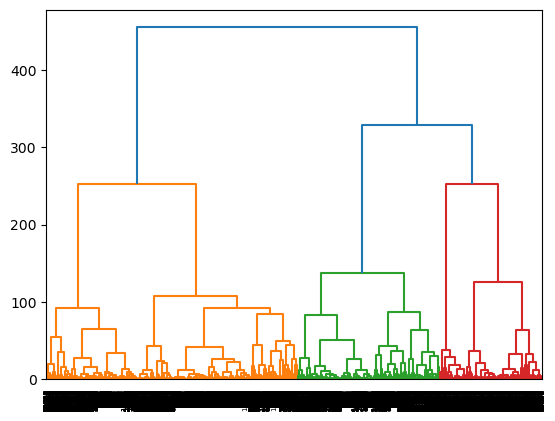

In [32]:
dend =  dendrogram(link)

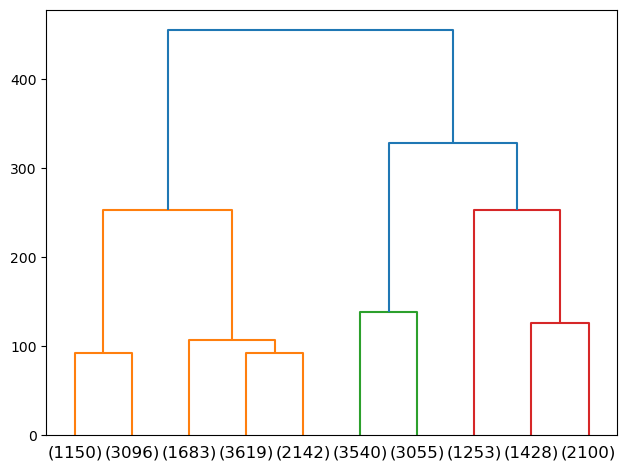

In [33]:
dend2 =  dendrogram(link,truncate_mode='lastp',p=10)
plt.tight_layout()

In [34]:
from sklearn.cluster import KMeans

In [35]:
wss = []
for i in range(1,11):
    KM=KMeans(n_clusters = i,random_state=42)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)


In [36]:
wss

[299858.0,
 187902.64770993276,
 139992.99382058423,
 105294.12073065137,
 72133.70665440225,
 62259.98939794785,
 55151.53403628371,
 49712.88755179983,
 44876.13773498573,
 41186.12875848641]

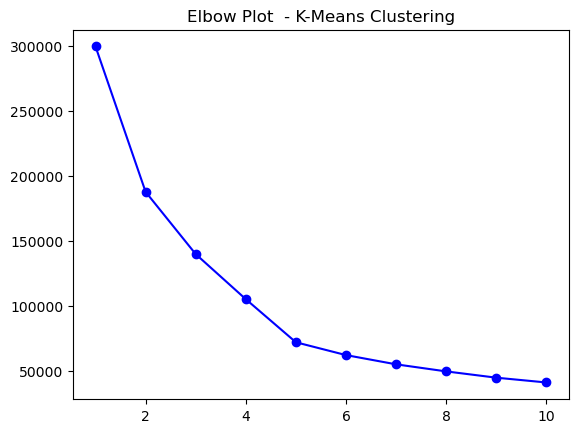

In [37]:
plt.title('Elbow Plot  - K-Means Clustering')
plt.plot(range(1,11),wss,'-bo')




In [38]:
# As per the elbow plot , the optimum number of clusters  is 5 as after it the drop flattens 

In [39]:
KM=KMeans(n_clusters = 5, random_state=42)
KM.fit(scaled_df)
KM.labels_

array([1, 1, 1, ..., 0, 4, 0])

In [40]:
print("Sum of Squares:",KM.inertia_)

Sum of Squares: 72133.70665440225


In [41]:
df['KM_Clus_Labels'] = KM.labels_

In [42]:
df

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,KM_Clus_Labels
0,2020-9-2-17,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,1806.0,325.0,323.0,1.0,0.00,0.35,0.0000,0.003100,0.000,0.00,1
1,2020-9-2-10,Format1,300.0,250.0,75000.0,Inter227,App,Mobile,Video,1780.0,285.0,285.0,1.0,0.00,0.35,0.0000,0.003500,0.000,0.00,1
2,2020-9-1-22,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,2727.0,356.0,355.0,1.0,0.00,0.35,0.0000,0.002800,0.000,0.00,1
3,2020-9-3-20,Format1,300.0,250.0,75000.0,Inter228,Video,Mobile,Video,2430.0,497.0,495.0,1.0,0.00,0.35,0.0000,0.002000,0.000,0.00,1
4,2020-9-4-15,Format1,300.0,250.0,75000.0,Inter217,Web,Desktop,Video,1218.0,242.0,242.0,1.0,0.00,0.35,0.0000,0.004100,0.000,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720.0,300.0,102000.0,Inter220,Web,Mobile,Video,1.0,1.0,1.0,1.0,0.07,0.35,0.0455,0.454344,29.975,0.07,0
23062,2020-11-2-7,Format5,720.0,300.0,102000.0,Inter224,Web,Desktop,Video,3.0,2.0,2.0,1.0,0.04,0.35,0.0260,0.454344,20.000,0.04,0
23063,2020-9-14-22,Format5,720.0,300.0,102000.0,Inter218,App,Mobile,Video,2.0,1.0,1.0,1.0,0.05,0.35,0.0325,0.454344,29.975,0.05,0
23064,2020-11-18-2,Format4,120.0,600.0,72000.0,inter230,Video,Mobile,Video,7.0,1.0,1.0,1.0,0.07,0.35,0.0455,0.454344,29.975,0.07,4


In [43]:
from sklearn.metrics import silhouette_score
sil_score = []
for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    labels = KM.labels_
    silScore = silhouette_score(scaled_df, labels)
    print('Number of Clusters = ',i,' and Silhouette Score = ',silScore)
    sil_score.append(silScore)
# from the following its clear that the silhouette score is the highest(0.48) when the number of clusters is 5 

Number of Clusters =  2  and Silhouette Score =  0.40318725804432765
Number of Clusters =  3  and Silhouette Score =  0.34546476709156715
Number of Clusters =  4  and Silhouette Score =  0.4032921585940855
Number of Clusters =  5  and Silhouette Score =  0.48020191939768275
Number of Clusters =  6  and Silhouette Score =  0.47613989974053916
Number of Clusters =  7  and Silhouette Score =  0.46883074857917595
Number of Clusters =  8  and Silhouette Score =  0.43228102175325334
Number of Clusters =  9  and Silhouette Score =  0.4141268391825048
Number of Clusters =  10  and Silhouette Score =  0.442487213046054


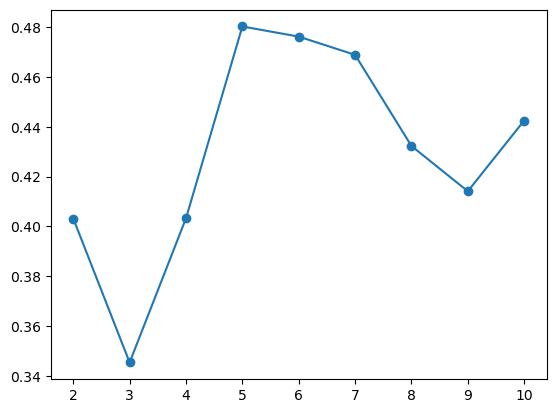

In [44]:
plt.plot(range(2,11),sil_score,'-o')

Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots]

Text(0.5, 0, 'Cluster Label, Device Type')

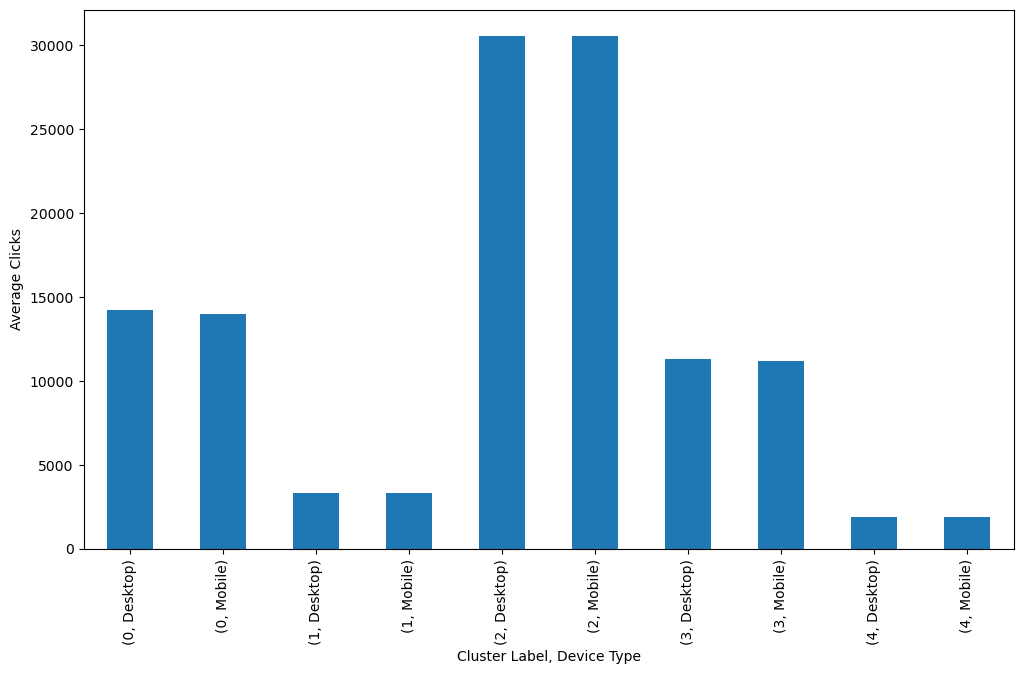

In [57]:
df.groupby(['KM_Clus_Labels','Device Type']).mean()['Clicks'].plot(kind='bar',figsize=(12,7))
plt.ylabel('Average Clicks')
plt.xlabel('Cluster Label, Device Type')

Text(0.5, 0, 'Cluster Label, Device Type')

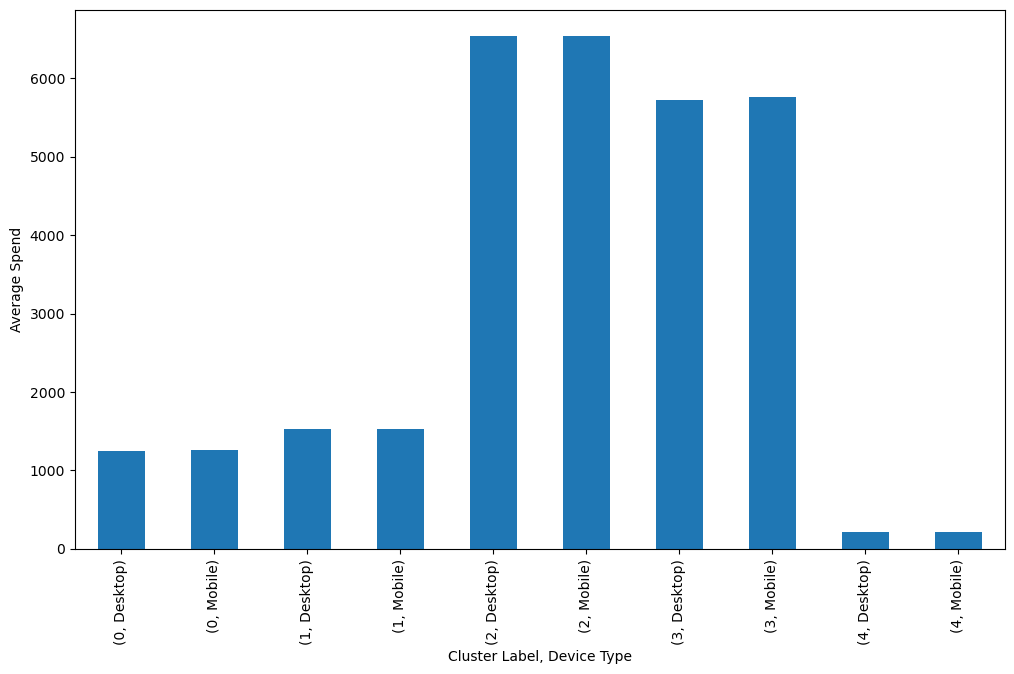

In [58]:
df.groupby(['KM_Clus_Labels','Device Type']).mean()['Spend'].plot(kind='bar',figsize=(12,7))
plt.ylabel('Average Spend')
plt.xlabel('Cluster Label, Device Type')

Text(0, 0.5, 'Average Revenue')

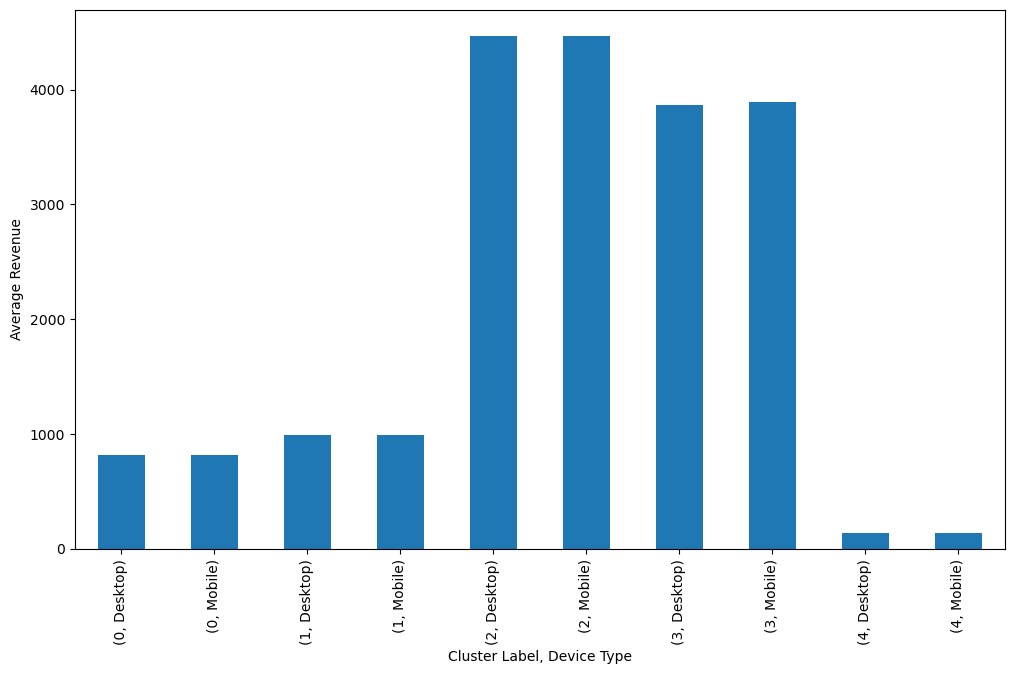

In [60]:
df.groupby(['KM_Clus_Labels','Device Type']).mean()['Revenue'].plot(kind='bar',figsize=(12,7))
plt.xlabel('Cluster Label, Device Type')
plt.ylabel('Average Revenue')

Text(0, 0.5, 'Average CPM')

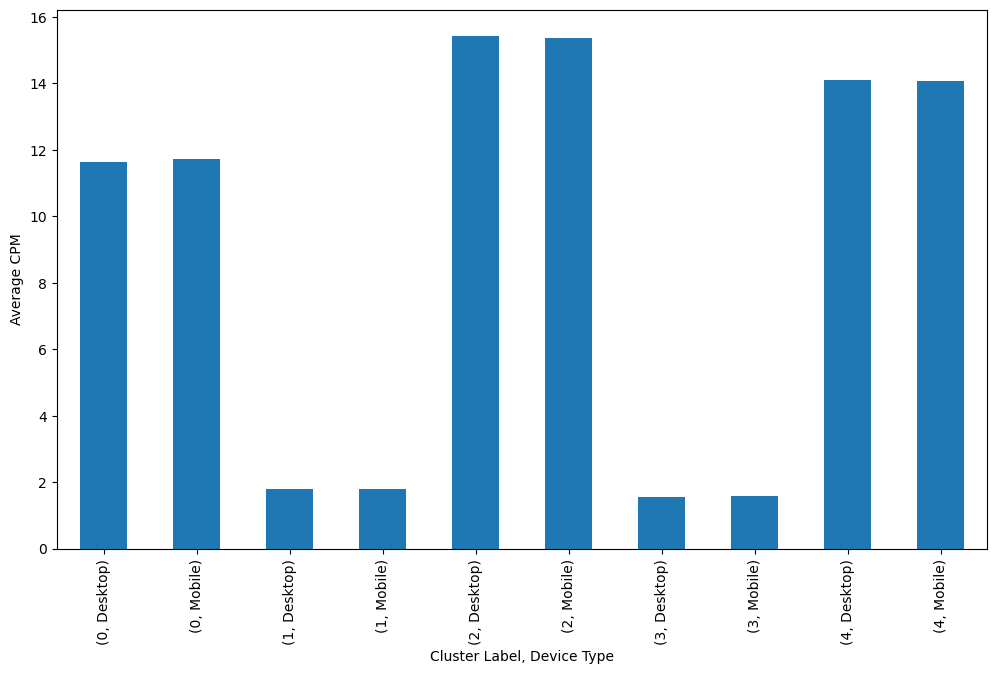

In [61]:
df.groupby(['KM_Clus_Labels','Device Type']).mean()['CPM'].plot(kind='bar',figsize=(12,7))
plt.xlabel('Cluster Label, Device Type')
plt.ylabel('Average CPM')

Text(0, 0.5, 'Average CTR')

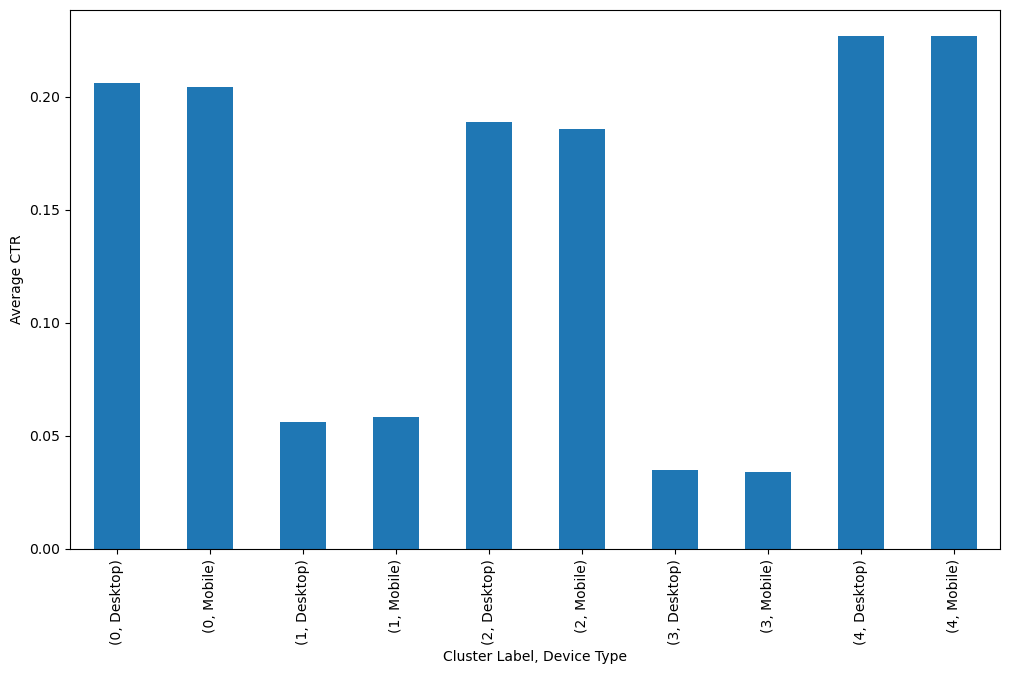

In [62]:
df.groupby(['KM_Clus_Labels','Device Type']).mean()['CTR'].plot(kind='bar',figsize=(12,7))
plt.xlabel('Cluster Label, Device Type')
plt.ylabel('Average CTR')

Text(0, 0.5, 'Average CPC')

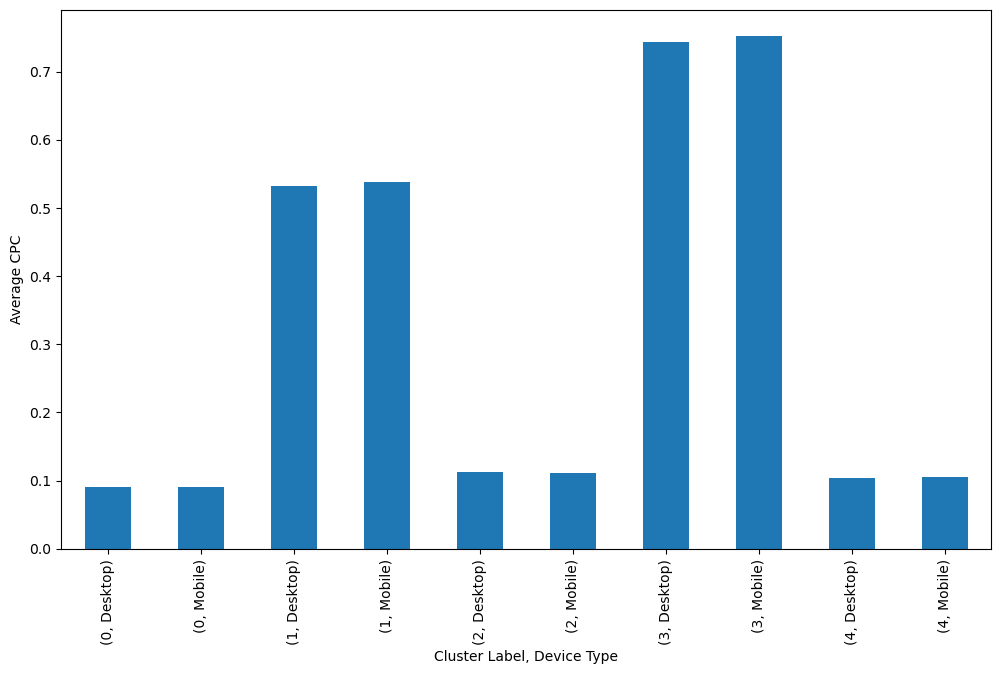

In [63]:
df.groupby(['KM_Clus_Labels','Device Type']).mean()['CPC'].plot(kind='bar',figsize=(12,7))
plt.xlabel('Cluster Label, Device Type')
plt.ylabel('Average CPC')

In [64]:
df.to_excel("Clust_ads.xlsx")

# Part 2

In [65]:
df = pd.read_excel('PCA+India+Data_Census.xlsx')

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [67]:
df.shape

(640, 61)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [69]:
df.isna().sum().sum()
# no null values

0

In [70]:
df.duplicated().sum()
# No Duplicated

0

In [71]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [72]:
df.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [73]:
df['GenderRatio_MaletoFemale'] = df['TOT_M']/df['TOT_F']
df

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F,GenderRatio_MaletoFemale
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,749,180,237,680,252,32,46,258,214,0.784938
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,715,123,229,186,148,76,178,140,160,0.847762
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,188,44,89,3,34,0,4,67,61,0.597045
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,247,61,128,13,50,4,10,116,59,0.661912
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,1928,465,1043,205,302,24,105,180,478,0.686802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,47,0,0,0,0,0,0,32,47,0.692131
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,337,3,14,38,130,4,23,110,170,0.569176
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,134,9,4,2,6,17,47,76,77,0.588973
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,172,24,44,11,21,1,4,100,103,0.649026


In [77]:
df.groupby(['State','Area Name']).mean()['GenderRatio_MaletoFemale'].sort_values(ascending=False)

State            Area Name     
Lakshadweep      Lakshadweep       0.868061
Jammu & Kashmir  Badgam            0.847762
Uttar Pradesh    Mahamaya Nagar    0.847313
Rajasthan        Dhaulpur          0.846911
Uttar Pradesh    Baghpat           0.844003
                                     ...   
Odisha           Baudh             0.451455
Andhra Pradesh   West Godavari     0.450076
Tamil Nadu       Virudhunagar      0.449352
Odisha           Koraput           0.440769
Andhra Pradesh   Krishna           0.437972
Name: GenderRatio_MaletoFemale, Length: 640, dtype: float64

In [78]:
df.groupby(['State','Area Name']).mean()['GenderRatio_MaletoFemale'].sort_values(ascending=True)

State            Area Name     
Andhra Pradesh   Krishna           0.437972
Odisha           Koraput           0.440769
Tamil Nadu       Virudhunagar      0.449352
Andhra Pradesh   West Godavari     0.450076
Odisha           Baudh             0.451455
                                     ...   
Uttar Pradesh    Baghpat           0.844003
Rajasthan        Dhaulpur          0.846911
Uttar Pradesh    Mahamaya Nagar    0.847313
Jammu & Kashmir  Badgam            0.847762
Lakshadweep      Lakshadweep       0.868061
Name: GenderRatio_MaletoFemale, Length: 640, dtype: float64

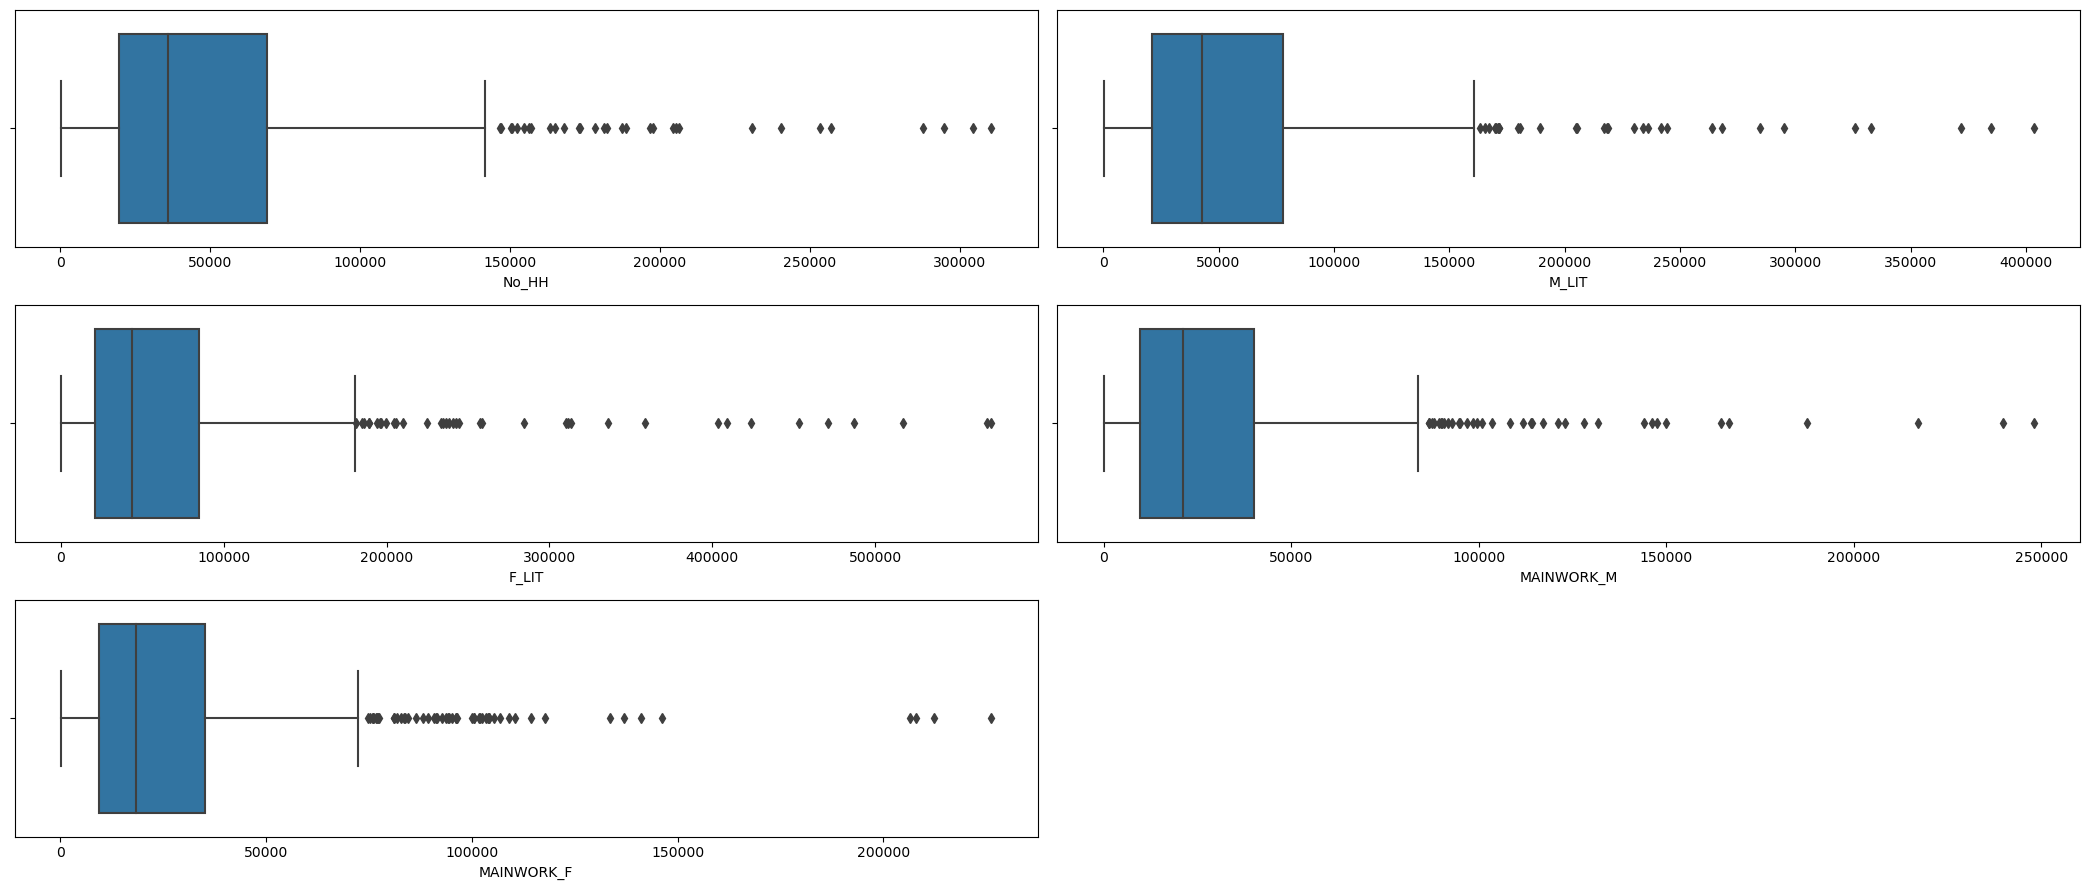

In [85]:
# Attributes for Further EDA No_HH, M_LIT, F_LIT, MAIN_WORK_M, MAIN_WORK_F
eda_df = ['No_HH', 'M_LIT', 'F_LIT', 'MAINWORK_M', 'MAINWORK_F']
plt.figure(figsize = (21,9))
for i in range(0,len(eda_df)):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[eda_df[i]])
plt.tight_layout()



In [86]:
df[eda_df].describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
M_LIT,640.0,57967.979688,55910.282466,286.0,21298.00,42693.5,77989.50,403261.0
F_LIT,640.0,66359.565625,75037.860207,371.0,20932.00,43796.5,84799.75,571140.0
MAINWORK_M,640.0,30204.446875,31480.915680,65.0,9787.00,21250.5,40119.00,247911.0
MAINWORK_F,640.0,28198.846875,29998.262689,240.0,9502.25,18484.0,35063.25,226166.0


Text(0, 0.5, 'Literates population Male')

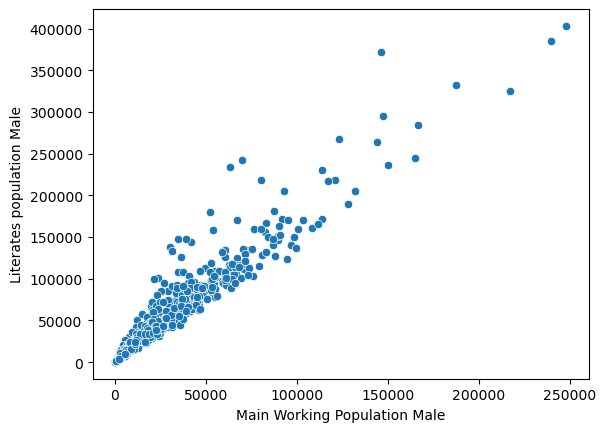

In [89]:
sns.scatterplot(df.MAINWORK_M,df.M_LIT)
plt.xlabel('Main Working Population Male')
plt.ylabel('Literates population Male')


Text(0, 0.5, 'Literates population Female')

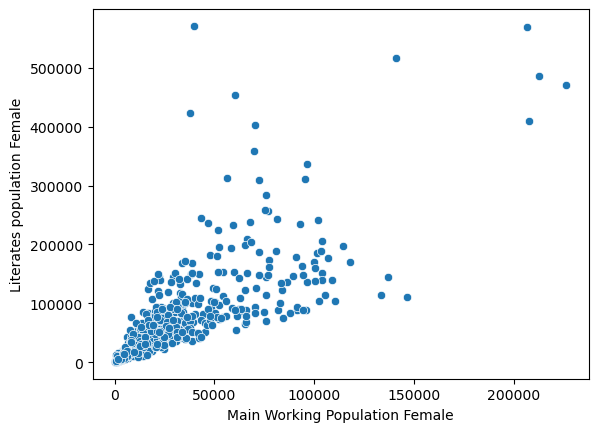

In [90]:
sns.scatterplot(df.MAINWORK_F,df.F_LIT)
plt.xlabel('Main Working Population Female')
plt.ylabel('Literates population Female')


In [91]:
df.drop(columns=['State', 'Area Name', 'State Code','Dist.Code'], axis=1, inplace=True)

In [92]:
num_df = df.select_dtypes('int64').columns

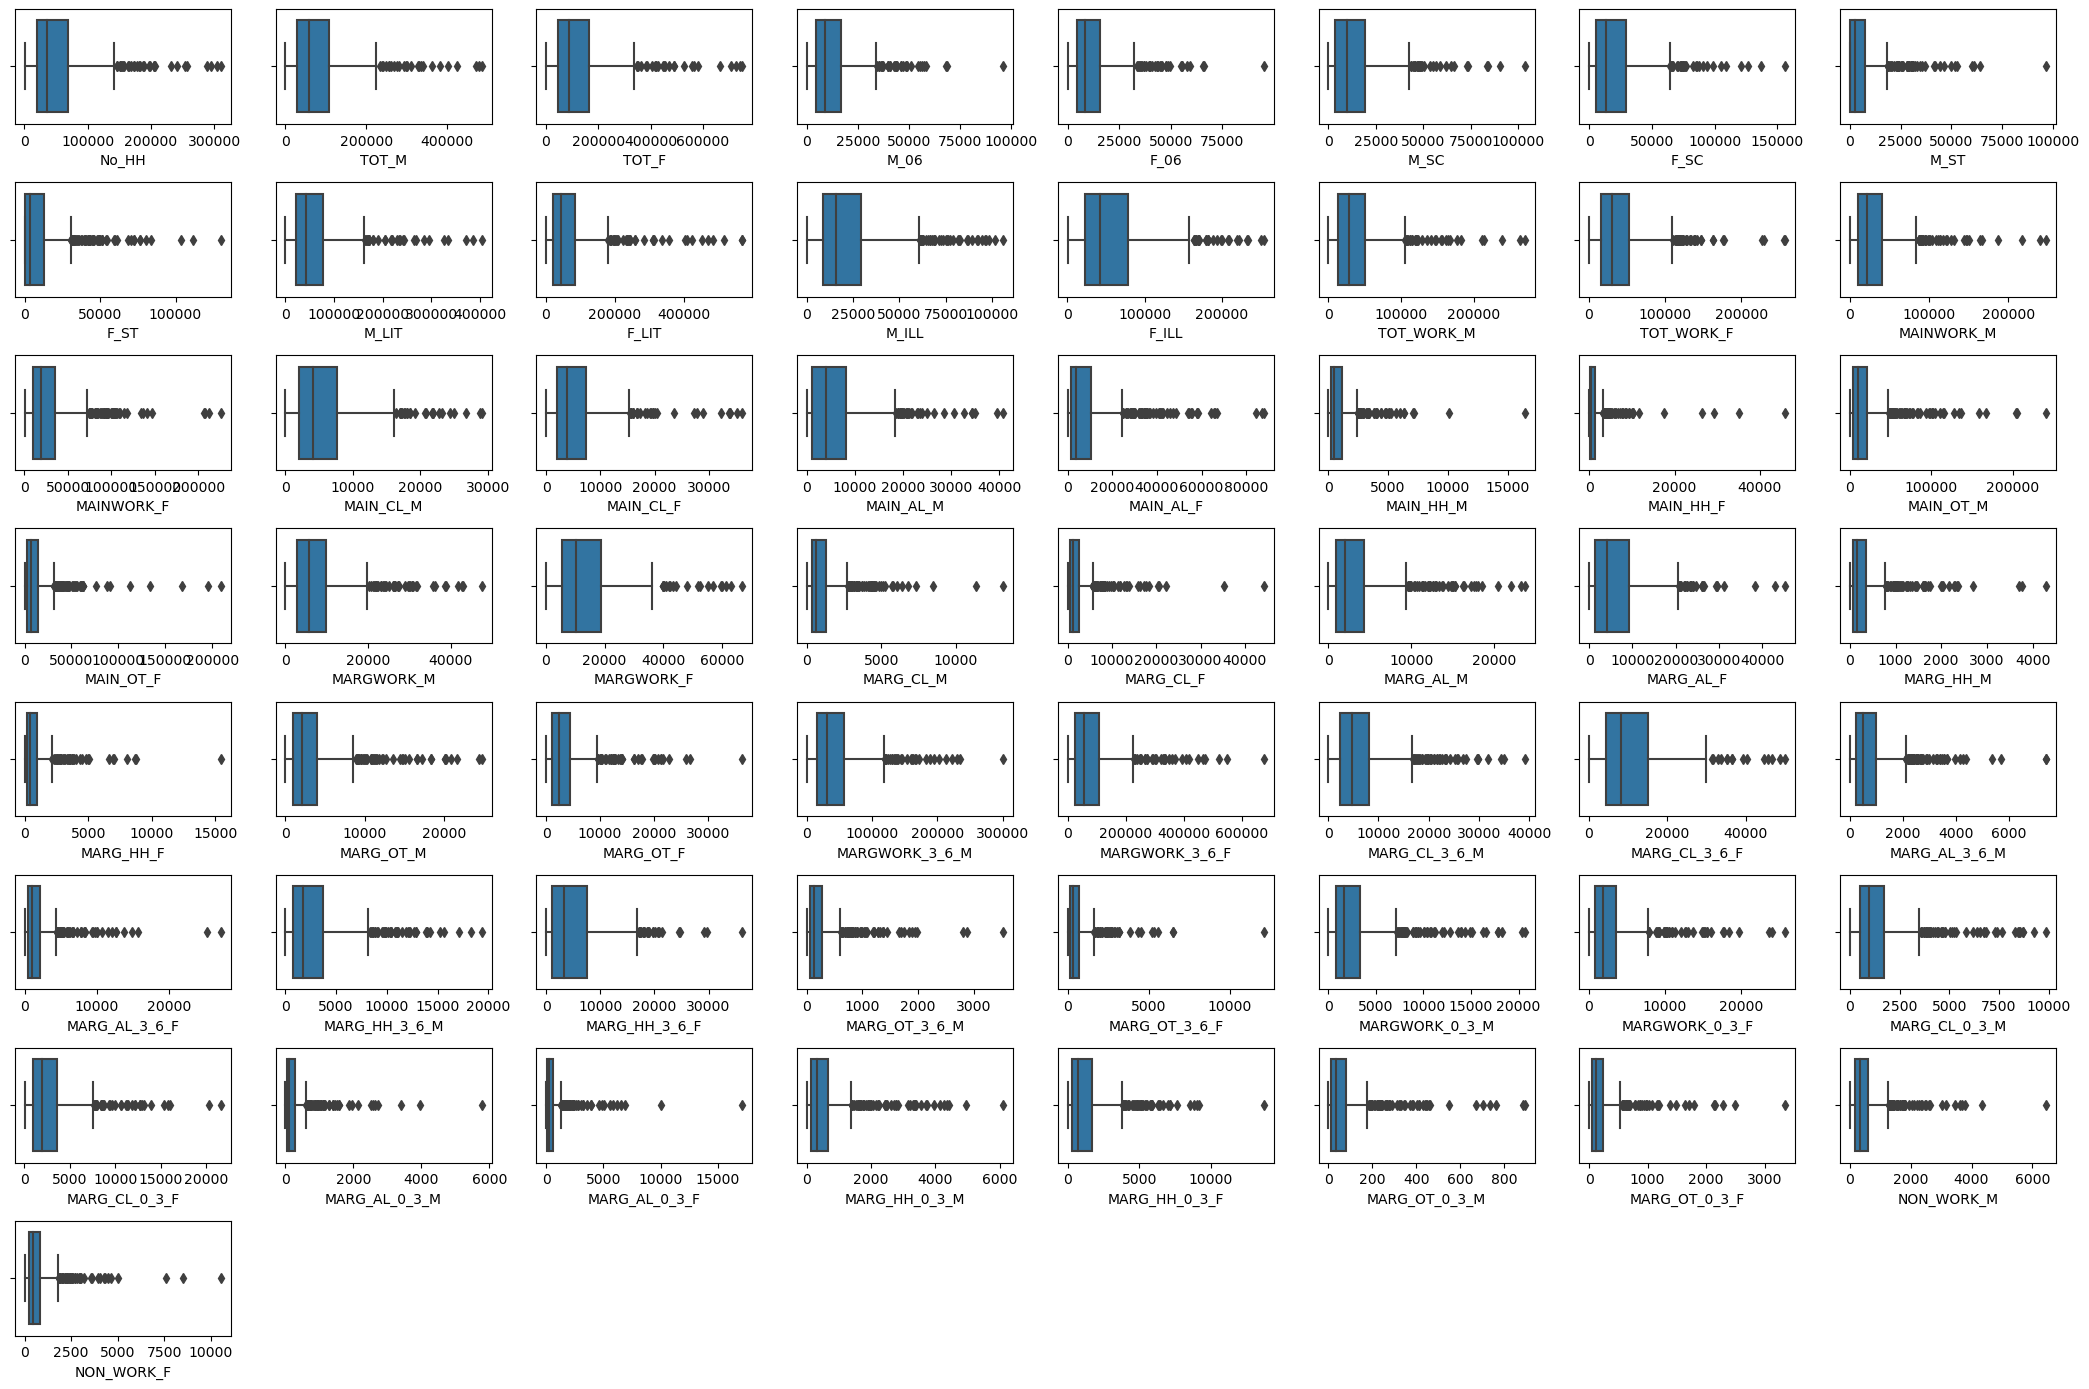

In [101]:
plt.figure(figsize = (21,14))
for i in range(0,len(num_df)):
    plt.subplot(8,8,i+1)
    sns.boxplot(df[num_df[i]])
plt.tight_layout()


In [102]:
from scipy.stats import zscore
scaled_df = df[num_df].apply(zscore)

In [103]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No_HH           640 non-null    float64
 1   TOT_M           640 non-null    float64
 2   TOT_F           640 non-null    float64
 3   M_06            640 non-null    float64
 4   F_06            640 non-null    float64
 5   M_SC            640 non-null    float64
 6   F_SC            640 non-null    float64
 7   M_ST            640 non-null    float64
 8   F_ST            640 non-null    float64
 9   M_LIT           640 non-null    float64
 10  F_LIT           640 non-null    float64
 11  M_ILL           640 non-null    float64
 12  F_ILL           640 non-null    float64
 13  TOT_WORK_M      640 non-null    float64
 14  TOT_WORK_F      640 non-null    float64
 15  MAINWORK_M      640 non-null    float64
 16  MAINWORK_F      640 non-null    float64
 17  MAIN_CL_M       640 non-null    flo

In [104]:
scaled_num_df = scaled_df.select_dtypes('float64').columns

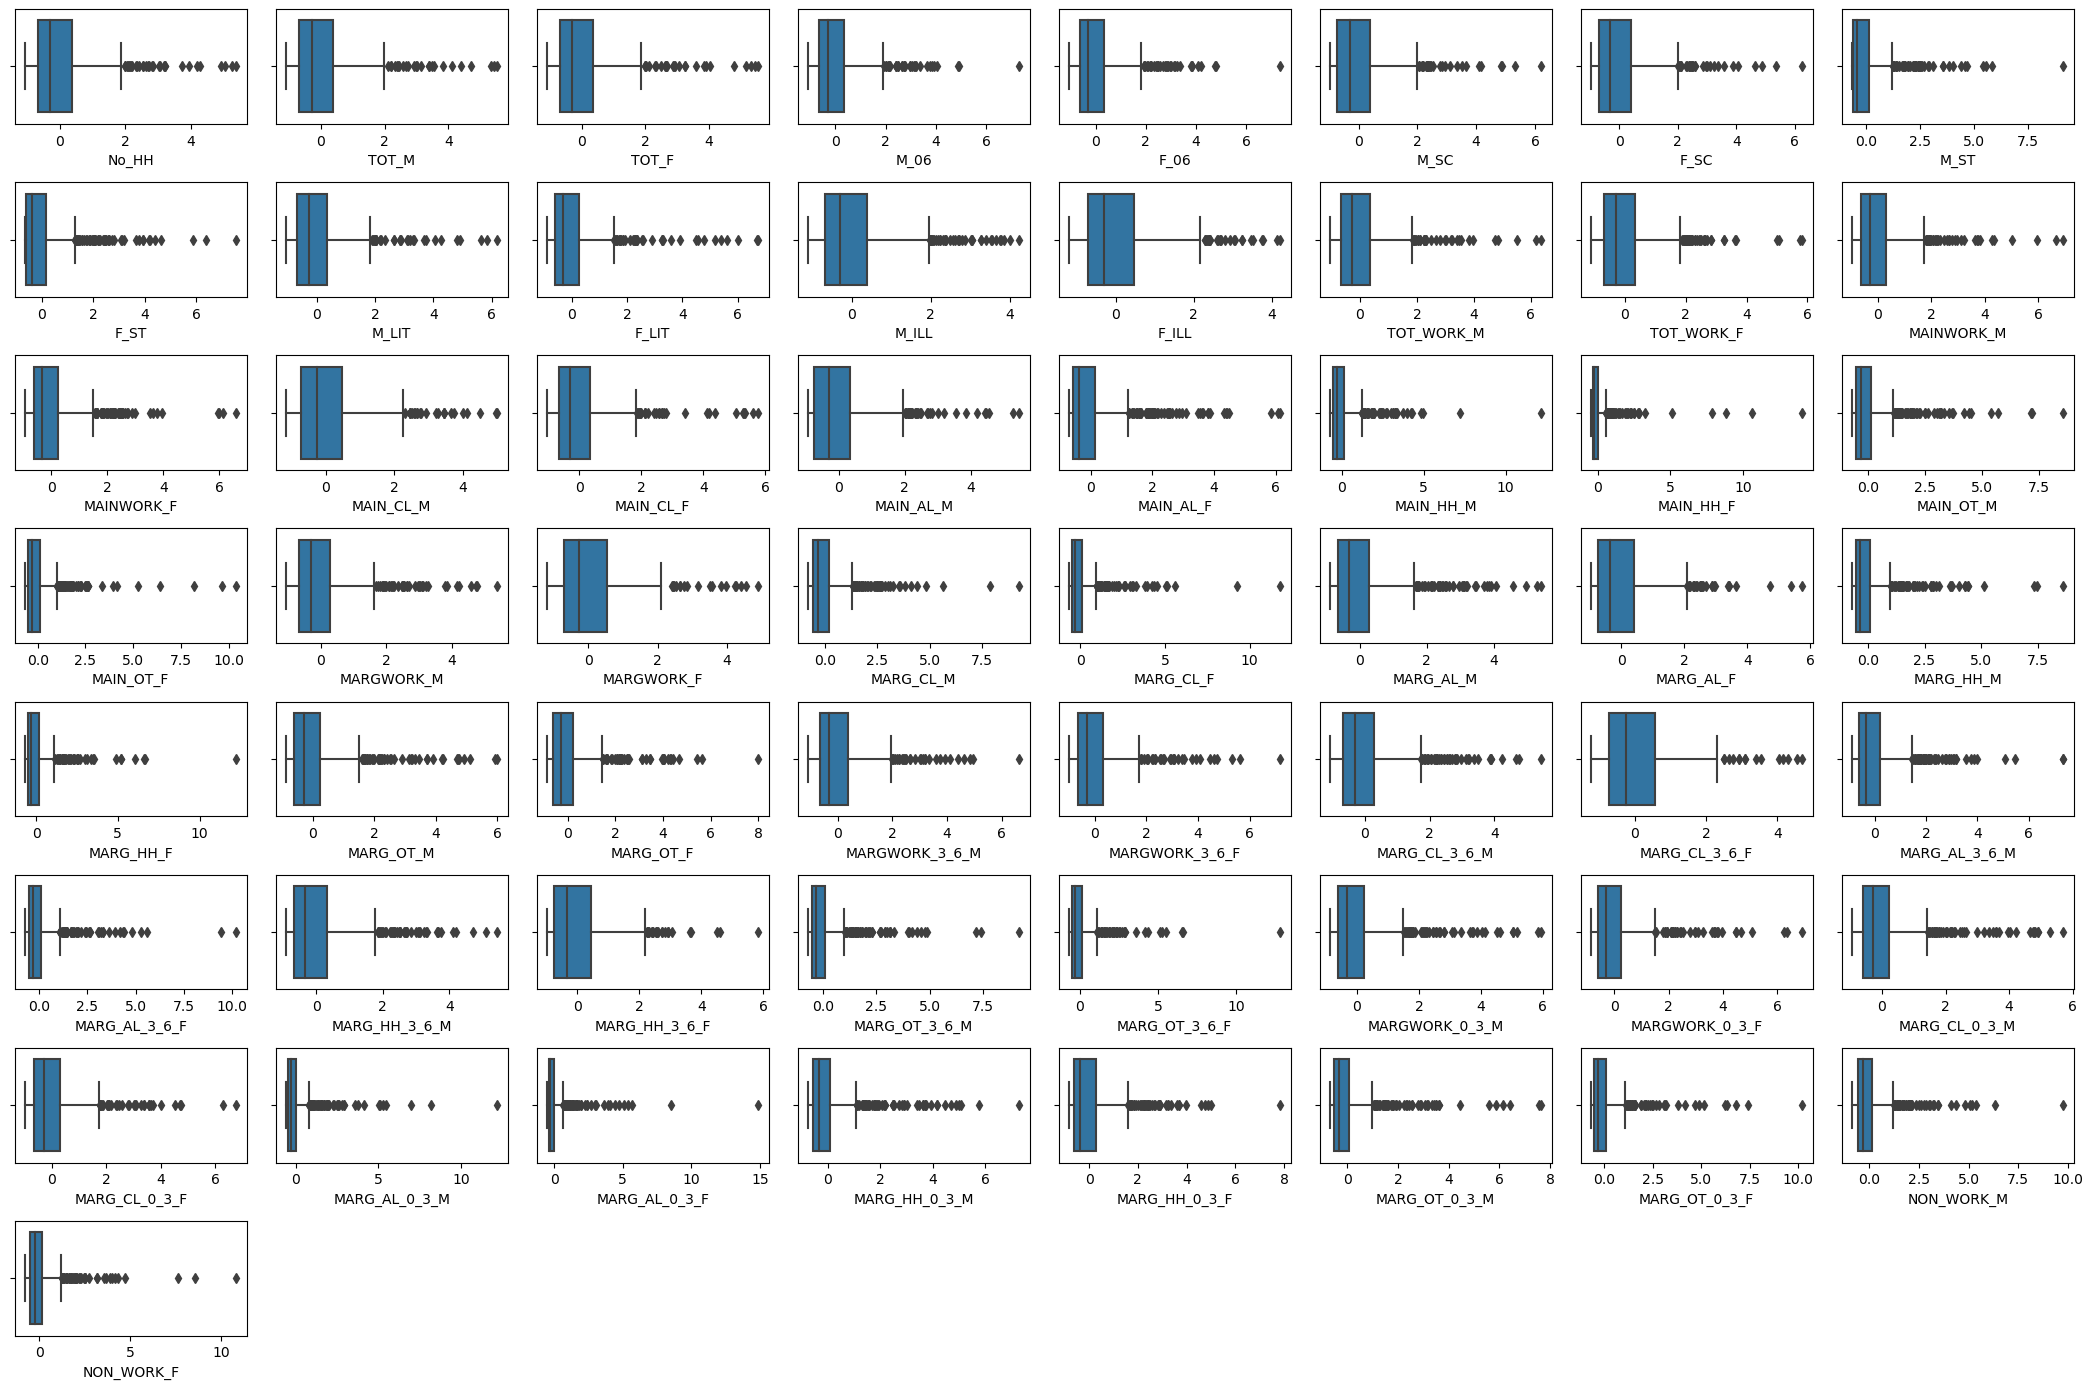

In [105]:
plt.figure(figsize = (21,14))
for i in range(0,len(scaled_num_df)):
    plt.subplot(8,8,i+1)
    sns.boxplot(scaled_df[scaled_num_df[i]])
plt.tight_layout()


In [106]:
from sklearn.decomposition import PCA

In [107]:
pca = PCA(n_components=57,random_state=42)

In [108]:
pca_transformed = pca.fit_transform(scaled_df)

In [109]:
pca.components_ #Eigen Vectors

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [ 0.        ,  0.2077636 ,  0.24647657, ..., -0.07217993,
         0.00399206, -0.06929081],
       [ 0.        ,  0.2887035 , -0.20596721, ...,  0.04019745,
        -0.03192722,  0.00778048],
       [-0.        ,  0.18790022,  0.02642675, ..., -0.02597314,
        -0.13972835, -0.02147533]])

In [118]:
pca.explained_variance_ # Eigen Values 

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [119]:
pca.explained_variance_ratio_

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

In [120]:
np.cumsum(pca.explained_variance_ratio_)
# as per the cumulative variance ratio the number of components should be 6

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [121]:
pca_final_df = pd.DataFrame(pca_transformed)
pca_final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-4.617263,0.138116,0.328545,1.543697,0.353737,-0.420947,-0.010393,0.479105,0.049653,-0.035607,...,-5.950611e-16,-2.919019e-16,7.386207e-17,-2.400638e-16,1.020305e-15,-5.169093e-16,2.332073e-16,-6.060291e-16,6.087480e-16,2.962072e-16
1,-4.771662,-0.105865,0.244449,1.963215,-0.153884,0.417310,-0.023119,-0.006797,0.424390,-0.190761,...,-9.517718e-16,-1.598146e-16,-1.915946e-15,-2.419004e-15,3.335448e-16,-3.076535e-16,2.514437e-16,2.274578e-16,1.684845e-16,4.643054e-16
2,-5.964836,-0.294347,0.367393,0.619543,0.478199,0.276580,0.069554,0.040713,0.162092,0.013163,...,2.579932e-15,6.885822e-16,5.858823e-16,1.142404e-15,-7.676472e-16,1.195188e-15,-1.983557e-16,4.151502e-16,-4.483185e-17,8.233497e-16
3,-6.280796,-0.500384,0.212701,1.074516,0.300799,0.051158,-0.250541,0.084362,0.150616,0.123880,...,-6.930522e-16,-1.683557e-15,-3.004614e-16,-1.672724e-16,-3.694178e-16,-2.566915e-16,1.131755e-15,4.344521e-16,1.017168e-15,1.936115e-15
4,-4.478566,0.894154,1.078277,0.535556,0.804065,0.341677,-0.092331,0.376964,-0.067445,0.196151,...,3.617309e-15,6.107916e-16,1.881179e-16,-1.892052e-15,4.200041e-16,-1.123043e-15,1.610693e-16,1.141638e-15,1.188735e-16,3.303498e-16


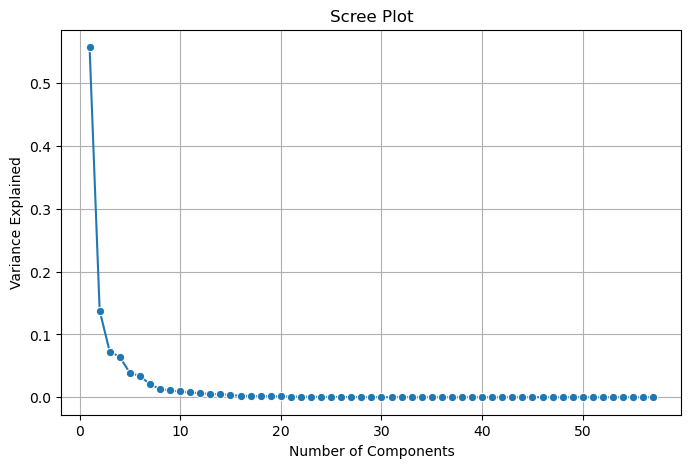

In [122]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

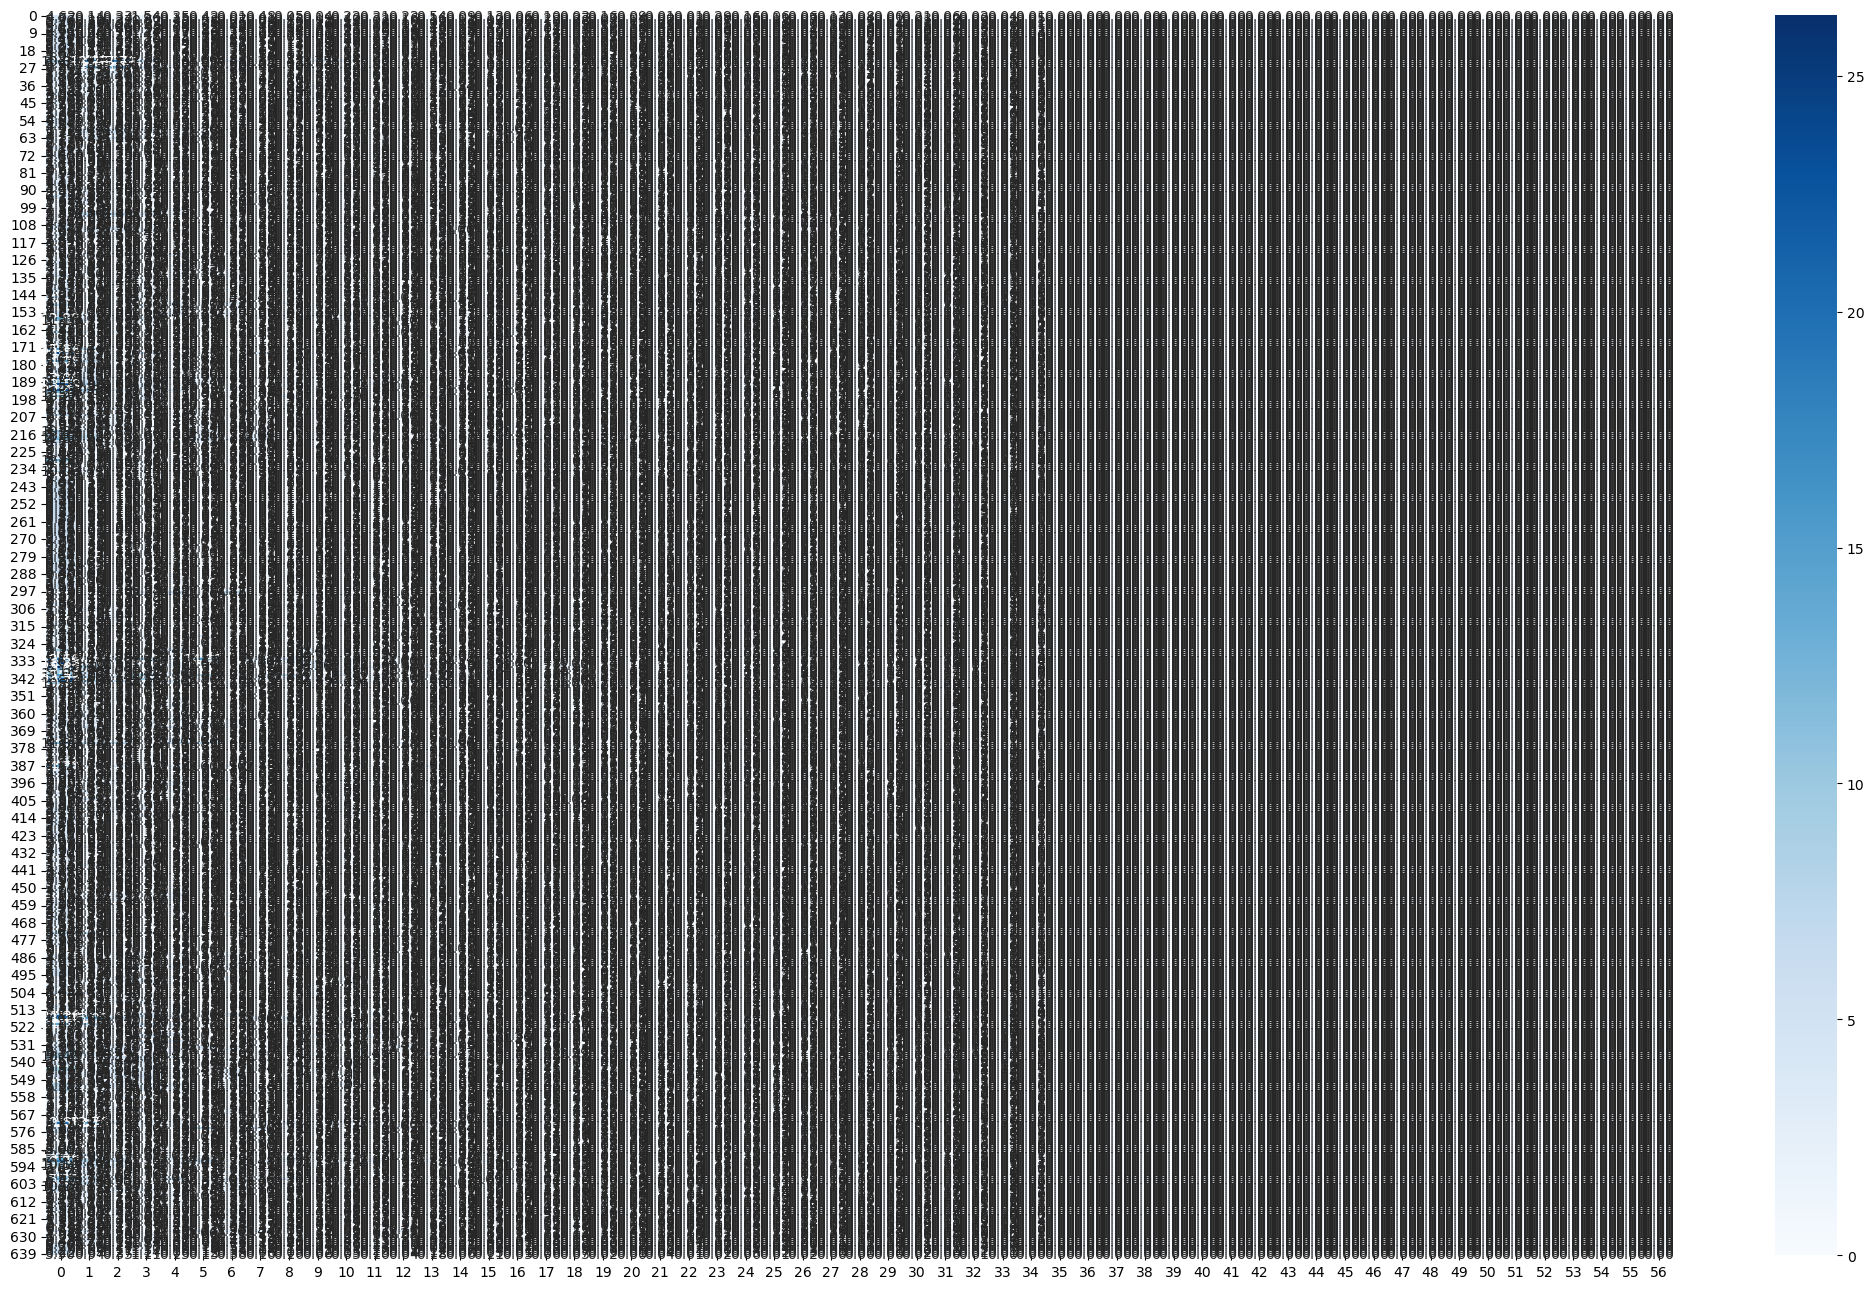

In [125]:
plt.figure(figsize=(21,13))
sns.heatmap(abs(pca_final_df), annot = True, cmap = 'Blues',fmt = '.2f');
plt.tight_layout()

In [27]:
for i in range(0,57):
    print("(",np.round(pca.components_[0][i],2),")",'*',scaled_df.columns[i], end=' + ')

( 0.16 ) * No_HH + ( 0.17 ) * TOT_M + ( 0.17 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.15 ) * M_SC + ( 0.15 ) * F_SC + ( 0.03 ) * M_ST + ( 0.03 ) * F_ST + ( 0.16 ) * M_LIT + ( 0.15 ) * F_LIT + ( 0.16 ) * M_ILL + ( 0.17 ) * F_ILL + ( 0.16 ) * TOT_WORK_M + ( 0.15 ) * TOT_WORK_F + ( 0.15 ) * MAINWORK_M + ( 0.12 ) * MAINWORK_F + ( 0.1 ) * MAIN_CL_M + ( 0.07 ) * MAIN_CL_F + ( 0.11 ) * MAIN_AL_M + ( 0.07 ) * MAIN_AL_F + ( 0.13 ) * MAIN_HH_M + ( 0.08 ) * MAIN_HH_F + ( 0.12 ) * MAIN_OT_M + ( 0.11 ) * MAIN_OT_F + ( 0.16 ) * MARGWORK_M + ( 0.16 ) * MARGWORK_F + ( 0.08 ) * MARG_CL_M + ( 0.05 ) * MARG_CL_F + ( 0.13 ) * MARG_AL_M + ( 0.11 ) * MARG_AL_F + ( 0.14 ) * MARG_HH_M + ( 0.13 ) * MARG_HH_F + ( 0.16 ) * MARG_OT_M + ( 0.15 ) * MARG_OT_F + ( 0.16 ) * MARGWORK_3_6_M + ( 0.16 ) * MARGWORK_3_6_F + ( 0.17 ) * MARG_CL_3_6_M + ( 0.16 ) * MARG_CL_3_6_F + ( 0.09 ) * MARG_AL_3_6_M + ( 0.05 ) * MARG_AL_3_6_F + ( 0.13 ) * MARG_HH_3_6_M + ( 0.11 ) * MARG_HH_3_6_F + ( 0.14 ) * MARG_OT_3_6_M + ( 0

### PCA with dimentionality reduction based on Scree Plot , ie number of principal components =6

In [126]:
pca = PCA(n_components=6,random_state=42)

In [127]:
pca_transformed = pca.fit_transform(scaled_df)

In [128]:
pca.components_

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01,
         1.51566500e-01,  2.72341946e-02,  2.81833150e-02,
         1.61992837e-01,  1.46872680e-01,  1.61749445e-01,
         1.65248187e-01,  1.59871988e-01,  1.45935804e-01,
         1.46200730e-01,  1.23970284e-01,  1.03127159e-01,
         7.45397856e-02,  1.13355712e-01,  7.38821590e-02,
         1.31572584e-01,  8.33826397e-02,  1.23526242e-01,
         1.11021264e-01,  1.64615479e-01,  1.55395618e-01,
         8.23885414e-02,  4.91953957e-02,  1.28598563e-01,
         1.14305073e-01,  1.40853227e-01,  1.27669598e-01,
         1.55262872e-01,  1.47286584e-01,  1.64971950e-01,
         1.61253433e-01,  1.65501611e-01,  1.55647049e-01,
         9.30142064e-02,  5.15358640e-02,  1.28576116e-01,
         1.10645843e-01,  1.39592763e-01,  1.24545909e-01,
         1.54293786e-01,  1.46285654e-01,  1.50125706e-01,
         1.40157047e-01,  5.25417829e-02,  4.17859530e-0

In [129]:
pca.explained_variance_

array([31.81356474,  7.86942415,  4.15340812,  3.66879058,  2.20652588,
        1.93827502])

In [130]:
pca.explained_variance_ratio_

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049,
       0.03395169])

In [131]:
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 ])

In [132]:
for i in range(0,6):
    print("(",np.round(pca.components_[0][i],2),")",'*',scaled_df.columns[i], end=' + ')

( 0.16 ) * No_HH + ( 0.17 ) * TOT_M + ( 0.17 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.15 ) * M_SC + 

In [133]:
pca_final_df = pd.DataFrame(pca_transformed, columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-4.617263,0.138116,0.328545,1.543697,0.353737,-0.420945
1,-4.771662,-0.105865,0.244449,1.963215,-0.153884,0.417312
2,-5.964836,-0.294347,0.367393,0.619543,0.478199,0.276582
3,-6.280796,-0.500384,0.212701,1.074515,0.300798,0.051156
4,-4.478566,0.894154,1.078277,0.535556,0.804067,0.341684
5,-3.319963,2.823865,3.058460,-0.447906,0.742448,0.634686
6,-5.021393,-0.346359,0.650378,0.981072,-0.059778,-0.246959
7,-4.608709,0.022370,0.398755,1.576995,0.171316,-0.139444
8,-5.186703,-0.059097,0.184397,1.735440,0.169174,0.455042
9,-4.226190,-1.335080,0.697838,1.470509,0.269146,-0.002577


<AxesSubplot:>

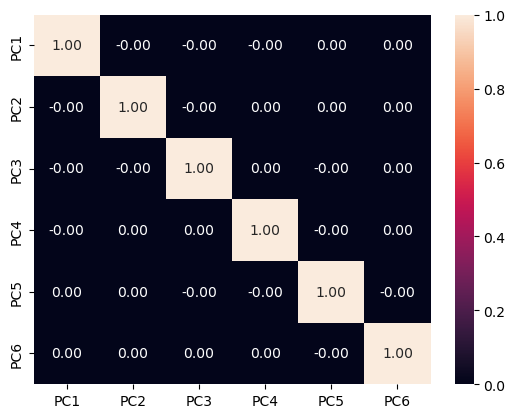

In [134]:
sns.heatmap(pca_final_df.corr(),annot=True,fmt='.2f')